Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import cv2
import os
import glob
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path

import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf

In [3]:
data_path = Path('/content/drive/MyDrive/flower_photos_unzipped')
dirs = data_path.glob('*')

In [4]:
# list of features and labels
data = []
img_size = 256

def make_data():
  for folder_dir in dirs:
      label= str(folder_dir).split('/')[-1]
      print(label)

      for image_path in folder_dir.glob('*.jpg'):
        img = image.load_img(image_path, target_size=(img_size,img_size))
        img_array = image.img_to_array(img)
        gray_img = tf.image.rgb_to_grayscale(img_array)
        data.append([gray_img, label])

make_data()

sunflower
tulip
rose
daisy
dandelion


In [5]:
len(data)

4323

In [6]:
def load_data():
  np.random.shuffle(data)
  features = []
  labels = []
  for img, label in data:
    features.append(img)
    labels.append(label)

  features = np.array(features, dtype=np.float32)
  labels = np.array(labels)
 
  return [features, labels] 

In [8]:
(features, labels) = load_data()

In [9]:
print(len(features), len(labels))

4323 4323


In [10]:
features.shape

(4323, 256, 256, 1)

In [11]:
labels.shape

(4323,)

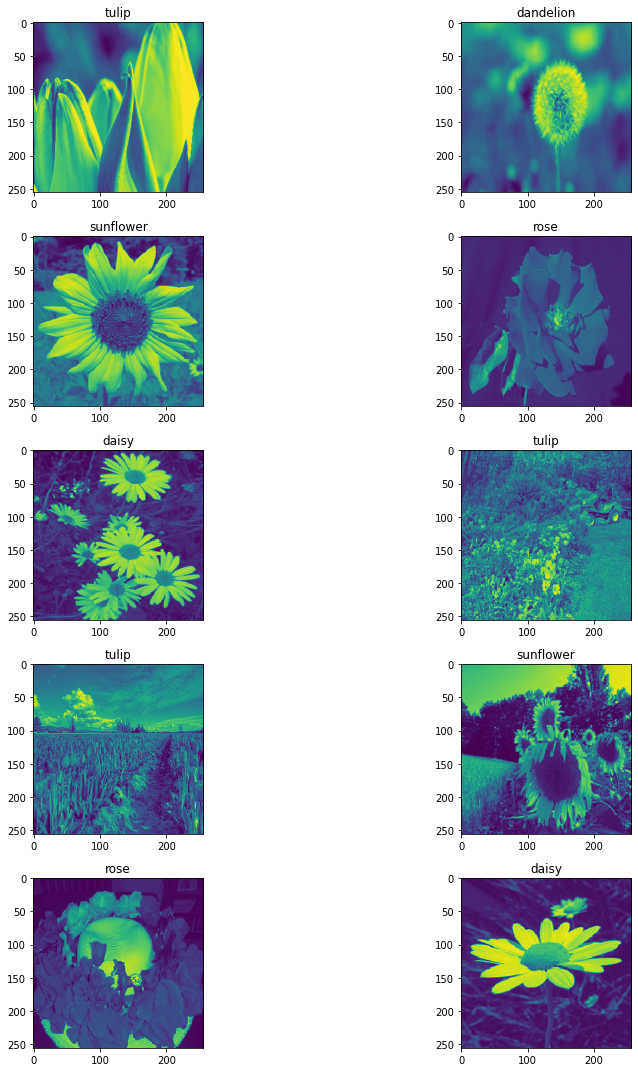

In [12]:
# drawing some random flower images
def draw_flower():
  fig,ax=plt.subplots(5,2)
  fig.set_size_inches(15,15)

  for i in range(5):
    for j in range(2):
      l = random.randint(0, len(labels))
      seq_img = features.squeeze()
      ax[i,j].imshow(seq_img[l])
      ax[i,j].set_title(labels[l])
  plt.tight_layout()

draw_flower()

In [13]:
# splitting data into 60% training set and 40% test set
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.40, random_state=42)

In [14]:
print(train_data.shape, test_data.shape)

(2593, 256, 256, 1) (1730, 256, 256, 1)


In [15]:
print(train_labels.shape, test_labels.shape)

(2593,) (1730,)


In [16]:
# reshaping and scaling train/test data
image_size = train_data.shape[1]

# reshape
train_data = train_data.reshape((-1,image_size*image_size))
test_data = test_data.reshape((-1,image_size*image_size))

# scale down
train_data = train_data/255.0
test_data = test_data/255.0

In [17]:
print(train_data.shape, test_data.shape)

(2593, 65536) (1730, 65536)


In [18]:
# encoding labels
from sklearn.preprocessing import LabelEncoder

# creating encoder
encoder = LabelEncoder()
# fit and transform labels
train_labels = encoder.fit_transform(train_labels)
test_labels = encoder.fit_transform(test_labels)

In [19]:
print(train_labels.shape, test_labels.shape)

(2593,) (1730,)


In [20]:
# baseline model definition
def baseline_model():
  model = Sequential([
      Dense(32, activation='relu', input_shape=(train_data.shape[-1],)),
      Dense(16, activation='relu'),
      Dense(5, activation='softmax')
  ])


  # compile the model
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model

In [21]:
model = baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                2097184   
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 85        
Total params: 2,097,797
Trainable params: 2,097,797
Non-trainable params: 0
_________________________________________________________________


In [22]:
# train model
model.fit(train_data, train_labels, epochs=60, batch_size=128)

Epoch 1/60
21/21 [==============================] - 3s 85ms/step - loss: 8.7484 - accuracy: 0.2238
Epoch 2/60
21/21 [==============================] - 2s 82ms/step - loss: 2.2168 - accuracy: 0.2606
Epoch 3/60
21/21 [==============================] - 2s 85ms/step - loss: 1.6115 - accuracy: 0.1809
Epoch 4/60
21/21 [==============================] - 2s 87ms/step - loss: 1.6101 - accuracy: 0.1830
Epoch 5/60
21/21 [==============================] - 2s 89ms/step - loss: 1.6088 - accuracy: 0.1811
Epoch 6/60
21/21 [==============================] - 2s 84ms/step - loss: 1.6083 - accuracy: 0.1878
Epoch 7/60
21/21 [==============================] - 2s 84ms/step - loss: 1.6066 - accuracy: 0.2481
Epoch 8/60
21/21 [==============================] - 2s 83ms/step - loss: 1.6053 - accuracy: 0.2401
Epoch 9/60
21/21 [==============================] - 2s 81ms/step - loss: 1.6057 - accuracy: 0.2367
Epoch 10/60
21/21 [==============================] - 2s 83ms/step - loss: 1.6028 - accuracy: 0.2422
Epoch 11/

In [23]:
# evaluation on test set
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 24.335260689258575


In [24]:
# make predictions
pred = model.predict(test_data)
pred[0]

array([0.17378682, 0.24266517, 0.18391691, 0.17317803, 0.22645299],
      dtype=float32)